In [1]:
%matplotlib inline


# Plotting Datasets

**Gerd Duscher**

08/25/2020

**Please download this example and run it as a notebook by scrolling to the
bottom of this page**


In [2]:
# Ensure python 3 compatibility:
from __future__ import division, print_function, absolute_import, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import sidpy as sid

print(sid.__version__)

0.0.2


## Plotting an Image
First, we make a sidpy dataset from a numpy array



In [3]:
x = np.random.normal(3, 2.5, size=(512, 512))
dset = sid.Dataset.from_array(x)

Next, we add some information about this dataset



In [4]:
dset.data_type = 'image'
dset.units = 'counts'
dset.quantity = 'intensity'

For plotting it is important to set the dimensions correctly.



In [5]:
dset.set_dimension(0, sid.Dimension('x', np.arange(dset.shape[0])*.02))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(1, sid.Dimension('y', np.arange(dset.shape[1])*.02))
dset.y.dimension_type = 'spatial'
dset.yunits = 'nm'
dset.y.quantity = 'distance'

Now we plot the dataset:



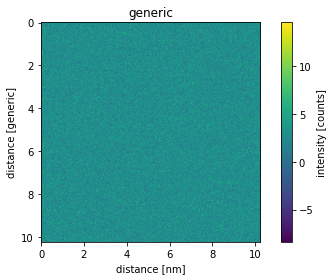

In [6]:
dset.plot()

## Creating an Image-Stack DataSet
In the following we will make a numpy which resembles a stack of images

In the ``sidpy Dataset`` will set the ``data_type`` to ``image_stack`` for the plotting routine to know how to plot this dataset.

The dimensions have to contain at least two ``spatial`` dimensions and one that is identifiable as a stack dimension ('stack, 'frame', 'time').
First we make a stack of images



In [7]:
x = np.random.normal(3, 2.5, size=(25, 512, 512))

dset = sid.Dataset.from_array(x)
dset.data_type = 'image_stack'
dset.units = 'counts'
dset.quantity = 'intensity'

dset.set_dimension(0, sid.Dimension('frame', np.arange(dset.shape[0])))
dset.frame.dimension_type = 'time'
dset.set_dimension(1, sid.Dimension('x', np.arange(dset.shape[1])*.02))
dset.x.dimension_type = 'spatial'
dset.x.units = 'nm'
dset.x.quantity = 'distance'
dset.set_dimension(2, sid.Dimension('y', np.arange(dset.shape[2])*.02))
dset.y.dimension_type = 'spatial'
dset.yunits = 'nm'
dset.y.quantity = 'distance'

## Plotting the Dataset
Please note that the scroll wheel will move you through the stack.

Zoom to an area and let it play!

Click on the ``Average`` button and then click on it again.



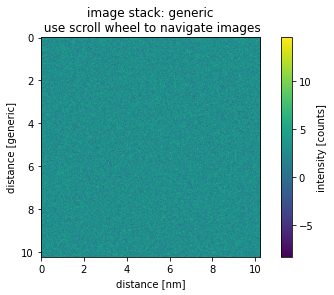

In [8]:
dset.plot()

The kwargs dictionary is used to plot the image stack in TEM style with scale bar



Shape of dataset is:  (25, 512, 512)
3D dataset


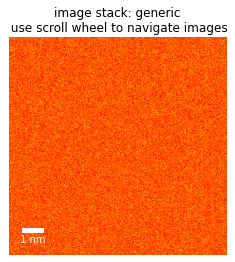

In [9]:
kwargs = {'scale_bar': True, 'cmap': 'hot'}  # or maby 'cmap': 'gray'
 
dset.plot(verbose=True, **kwargs)

## Plot Dataset as Spectral Image
We need to change the data_type of the dataset to ``spectrum_image`` and the dimension_type of one dimension to ``spectral``.

Now the plot function plots it as a spectrum image.

Select the spectrum with the mouse (left click).



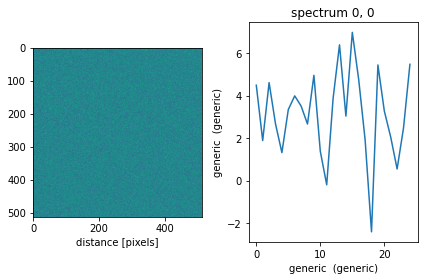

In [10]:
dset.data_type = 'spectrum_image'
dset.set_dimension(0, sid.Dimension('spectrum', np.arange(dset.shape[0])))
dset.spectrum.dimension_type = 'spectral'

dset.plot()

We make the selection more visible by setting the binning of the spectra selection.

The binning avrages over the binning box.

Run the code-cell below and look in the plot above.



In [11]:
dset.view.set_bin([20, 20])

plt.show()

The axes (and figure) instances of matplotlib can be accessed throught the ``view`` attribute of  the sidpy dataset.



In [12]:
x, y = np.mgrid[0:501:100, 0:501:100] + 5
dset.view.axes[0].scatter(x, y, color='red');

In [13]:
kwargs = {'scale_bar': True, 'cmap': 'hot'}
    
view = sid.viz.dataset_viz.ImageStackVisualizer(dset, **kwargs)
plt.show()

KeyError: 'We need one dimensions with dimension_type stack, time or frame'

<Figure size 432x288 with 0 Axes>

In [14]:
print(dset.shape)
kwargs = {'scale_bar': True, 'cmap': 'hot'}
view = sid.dataset_viz.ImageVisualizer(dset, image_number=5, **kwargs)

(25, 512, 512)


AttributeError: module 'sidpy' has no attribute 'dataset_viz'

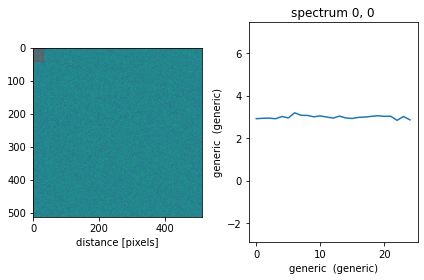

In [15]:
dset.data_type = 'spectrum_image'
dset.set_dimension(0, sid.Dimension('spectrum',np.arange(dset.shape[0])))
dset.spectrum.dimension_type = 'spectral'
view = sid.viz.dataset_viz.SpectralImageVisualizer(dset)
view.set_bin([30, 40])
plt.show()

In [16]:
dset.data_type = 'spectrum_image'
dset.set_dimension(0, sid.Dimension('spectrum',np.arange(dset.shape[0])))
dset.spectrum.dimension_type = 'spectral'
# view = SpectralImageVisualizer(dset)
# dset.plot()